<a href="https://colab.research.google.com/github/CIGLR-ai-lab/GreatLakes-TempSensors/blob/main/notebooks/03_dcj_FVCOM_data_loading_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import matplotlib as mpl
from astropy.time import Time
import pandas as pd
import numpy as np

In [ ]:
# Mounting Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
fpath = '/content/gdrive/MyDrive/CIGLR Summer Fellows/DeepSensor-2024/sst-input-data-sample/FVCOM/SST_splits/2019_SST.nc'

In [ ]:
# plotting the water surface elevation data over the triangular grid

# Path to the NetCDF file
netcdf_file = fpath

# Open the NetCDF file with decode_times=False
xrds = xr.open_dataset(netcdf_file, drop_variables=['siglay'], decode_times=False)

# Remove the 'siglay' dimension as it is a singleton dimension
xrds_squeezed = xrds.squeeze('siglay', drop=True)

print(xrds_squeezed)

<xarray.Dataset>
Dimensions:  (node: 13964, three: 3, nele: 26210, time: 1460)
Coordinates:
    lat      (node) float32 ...
    lon      (node) float32 ...
  * time     (time) float32 5.848e+04 5.848e+04 ... 5.885e+04 5.885e+04
Dimensions without coordinates: node, three, nele
Data variables:
    h        (node) float32 ...
    nv       (three, nele) int32 ...
    temp     (time, node) float32 ...
    zeta     (time, node) float32 ...
Attributes: (12/17)
    title:                       narr_1921
    institution:                 School for Marine Science and Technology
    source:                      FVCOM_3.0
    history:                     Mon Feb  5 17:27:04 2024: ncrcat -d siglay,0...
    references:                  http://fvcom.smast.umassd.edu, http://codfis...
    Conventions:                 CF-1.0
    ...                          ...
    Surface_Heat_Forcing:        FVCOM variable surface heat forcing file:\nF...
    Surface_Wind_Forcing:        FVCOM variable surface Wind 

In [ ]:
# Select the date to plot
input_date = '2019-03-03'

# Convert input date to MJD
input_date_mjd = Time(input_date).mjd

# Coordinates
lat = xrds_squeezed['lat'].values
lon = xrds_squeezed['lon'].values
nv = xrds_squeezed['nv'].values - 1  # Adjust for 0-based indexing in Python

# Access the 'temp' variable and other necessary data
#zeta = xrds_squeezed['zeta']
temp = xrds_squeezed['temp']
#wet_nodes = xrds_squeezed['wet_nodes']

# Select temperature data nearest to the input date
temp_at_time = temp.sel(time=input_date_mjd, method='nearest')

# We don't seem to have 'wet nodes' as a variables
#wet_nodes_at_time = wet_nodes.sel(time=desired_date)

# Since we want to plot over nodes, ensure the temperature data is at node locations
if 'node' in temp_at_time.dims:
    temp_at_nodes = temp_at_time.values

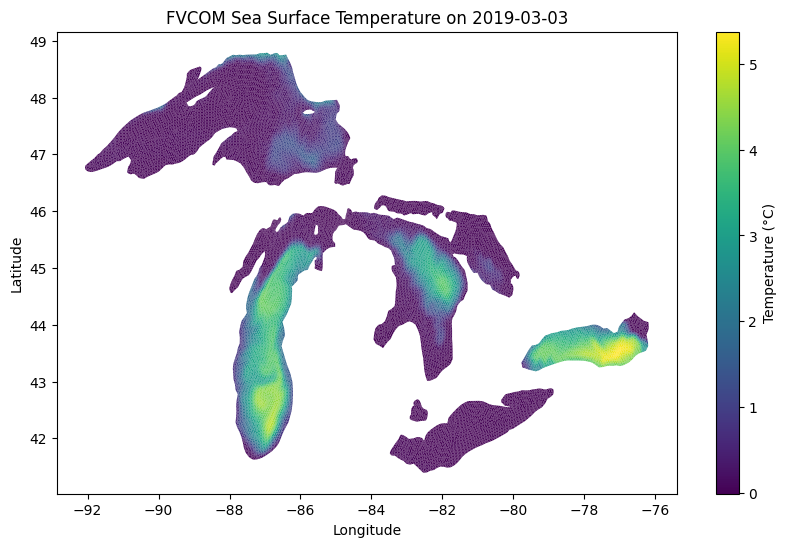

In [ ]:
# Create the triangulation object
triang = tri.Triangulation(lon-360, lat, triangles=nv.T)

# Plotting the temperature data
plt.figure(figsize=(10, 6))
plt.tripcolor(triang, temp_at_nodes, cmap='viridis', edgecolors='white', linewidth=0.001)
plt.colorbar(label='Temperature (°C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Retrieve the time value for the title
selected_time_value = xrds['time'].sel(time=input_date_mjd, method='nearest').values
selected_time_str = pd.to_datetime(selected_time_value).strftime('%Y-%m-%d')
plt.title(f'FVCOM Sea Surface Temperature on {input_date}')
plt.show()

# Can we extract the bathymetry using this code?

The field "h" is the bathymetry in this FVCOM dataset

In [ ]:
# Access the bathymetry data
h = xrds['h'].values

Text(0.5, 1.0, 'Bathymetry')

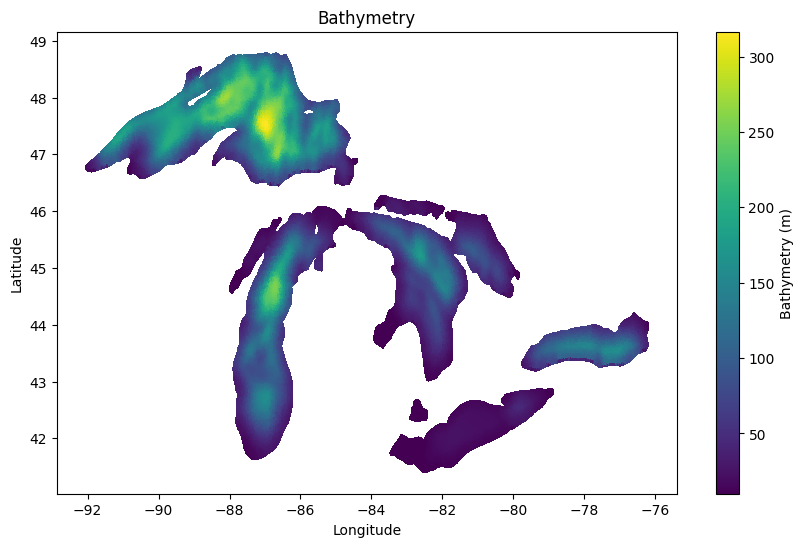

In [ ]:
# Plot the bathymetry data
plt.figure(figsize=(10, 6))
plt.tripcolor(triang, h, cmap='viridis', shading='flat')
plt.colorbar(label='Bathymetry (m)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bathymetry')